<a href="https://colab.research.google.com/github/MichelleIhetu/ML_Learning_Track/blob/main/Project%20Learning/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
edata = files.upload()

Saving features_raw 1(in).csv to features_raw 1(in).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import io
import pandas as pd

# Assuming you want to process the first uploaded file
filename = list(edata.keys())[0]
file_content = edata[filename]

# Decode bytes to string and use StringIO to read with pandas
df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))

display(df)

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


In [4]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Noise Reduction
df = df.dropna() #rid of empty values
display(df)

z_scores = zscore(df) #were removing outlier
threshold = 3  # Define your threshold

# Filter out outliers
filtered_data_zscore = df[(z_scores < threshold) & (z_scores > -threshold)]
print("Data after Z-score outlier removal:", filtered_data_zscore)

#Here we are normalizing data
# Initialize MinMaxScaler
scaler = MinMaxScaler()


df_normalized_sklearn = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nNormalized DataFrame (Scikit-learn):")
print(df_normalized_sklearn)



,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


Data after Z-score outlier removal:            Fp1       AF3         F3         F7        FC5       FC1  \
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
0     0.057813 -1.335266   4.640480   0.219573   7.473817  2.314842   
...        ...       ...        ...        ...        ...       ...   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   
8063  2.641319  3.967536 -11.562283 -18.074156 -26.700735 -5.975564   

             C3        T7        CP5        CP1  ...         FC2        Cz  \
0      1.918097 -9.257533   9.089

In [6]:
#Filter
#Smoothing data using the savitzky-golay filter to preserve signal features while reducing noise
smoothed_data_sg = savgol_filter(df_normalized_sklearn, window_length=32, polyorder=3, axis=0) # window_length must be odd
display(smoothed_data_sg)

array([[0.50353111, 0.59576372, 0.55327872, ..., 0.56365551, 0.4061273 ,
        0.39571922],
       [0.51329481, 0.58743663, 0.53281   , ..., 0.55458603, 0.41177674,
        0.40377465],
       [0.52121294, 0.58028316, 0.51502899, ..., 0.54736025, 0.41647347,
        0.41086644],
       ...,
       [0.56507007, 0.58721097, 0.40243423, ..., 0.58722745, 0.34961001,
        0.37318582],
       [0.58364768, 0.58773215, 0.34901862, ..., 0.59825289, 0.31718723,
        0.34063876],
       [0.6047684 , 0.58811552, 0.28664167, ..., 0.61083993, 0.27966788,
        0.30224591]])

In [7]:
!pip install pybaselines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 5.3 MB/s eta 0:00:00


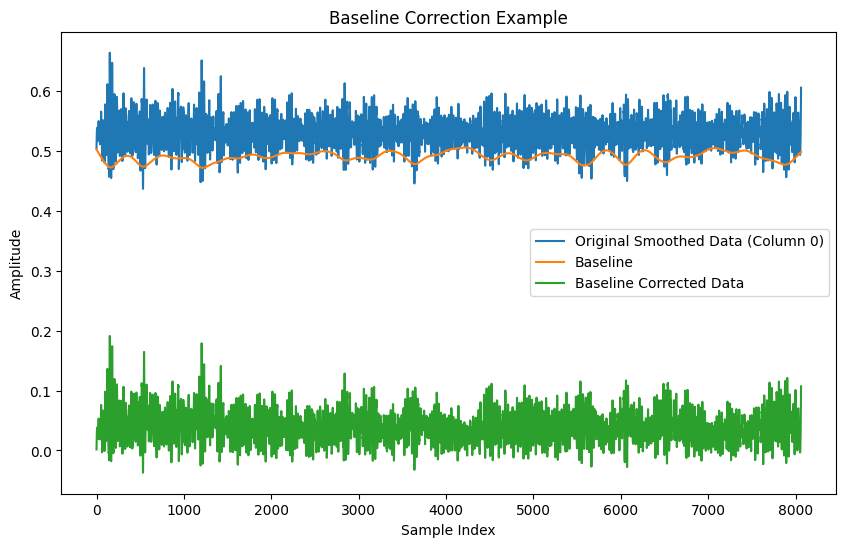

In [8]:
#Baseline Correction
from pybaselines import Baseline

# Using the smoothed data from the previous step
# We'll apply baseline correction to the first column as an example
y_data = smoothed_data_sg[:, 0]
x_data = np.arange(len(y_data))

baseline_fitter = Baseline()

baseline_values, params = baseline_fitter.asls(y_data)

# Subtract the baseline from the original data
corrected_data = y_data - baseline_values

# You can now plot the original, baseline, and corrected data
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Original Smoothed Data (Column 0)')
plt.plot(x_data, baseline_values, label='Baseline')
plt.plot(x_data, corrected_data, label='Baseline Corrected Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Baseline Correction Example')
plt.legend()
plt.show()


In [9]:
#Feature extraction
from tsfresh import extract_features
import pandas as pd # Ensure pandas is imported

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
        transformers=[
            ('columns', OneHotEncoder(), ['Fp1'], ['AF3'], ['F3'], ['F7'], ['FC5'], ['FC1'], ['C3'], ['T7'], ['CP5'], ['CP1'], ['P3'], ['P7'], ['PO3'], ['O1'], ['Oz'], ['Pz'], ['Fp2'], ['AF4'], ['Fz'], ['F4'], ['F8'], ['FC6'], ['FC2'], ['Cz'], ['C4'], ['T8'], ['CP6'], ['CP2'], ['P4'], ['P8'], ['PO4'], ['O2'])
        ])

    # You can then use this preprocessor in a larger pipeline
Pipeline([('preprocessor', preprocessor), ('model', RandomForestClassifier())])
display(Pipeline)

model_applied = RandomForestClassifier(preprocessor)
display(model_applied)

sklearn.pipeline.Pipeline

RandomForestClassifier(n_estimators=ColumnTransformer(transformers=[('columns',
                                                                     OneHotEncoder(),
                                                                     ['Fp1'],
                                                                     ['AF3'],
                                                                     ['F3'],
                                                                     ['F7'],
                                                                     ['FC5'],
                                                                     ['FC1'],
                                                                     ['C3'],
                                                                     ['T7'],
                                                                     ['CP5'],
                                                                     ['CP1'],
                                                                     ['P3'],
                                                                     ['P7'],
                                                                     ['PO3'],
                                                                     ['O1'],
                                                                     ['Oz'],
                                                                     ['Pz'],
                                                                     ['Fp2'],
                                                                     ['AF4'],
                                                                     ['Fz'],
                                                                     ['F4'],
                                                                     ['F8'],
                                                                     ['FC6'],
                                                                     ['FC2'],
                                                                     ['Cz'],
                                                                     ['C4'],
                                                                     ['T8'],
                                                                     ['CP6'],
                                                                     ['CP2'], ...)]))

In [10]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.7 MB/s eta 0:00:00


Creating RawArray with float64 data, n_channels=1, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.652 s)

Effective window size : 8.192 (s)
Alpha power for each channel: [2.35365517e-12]


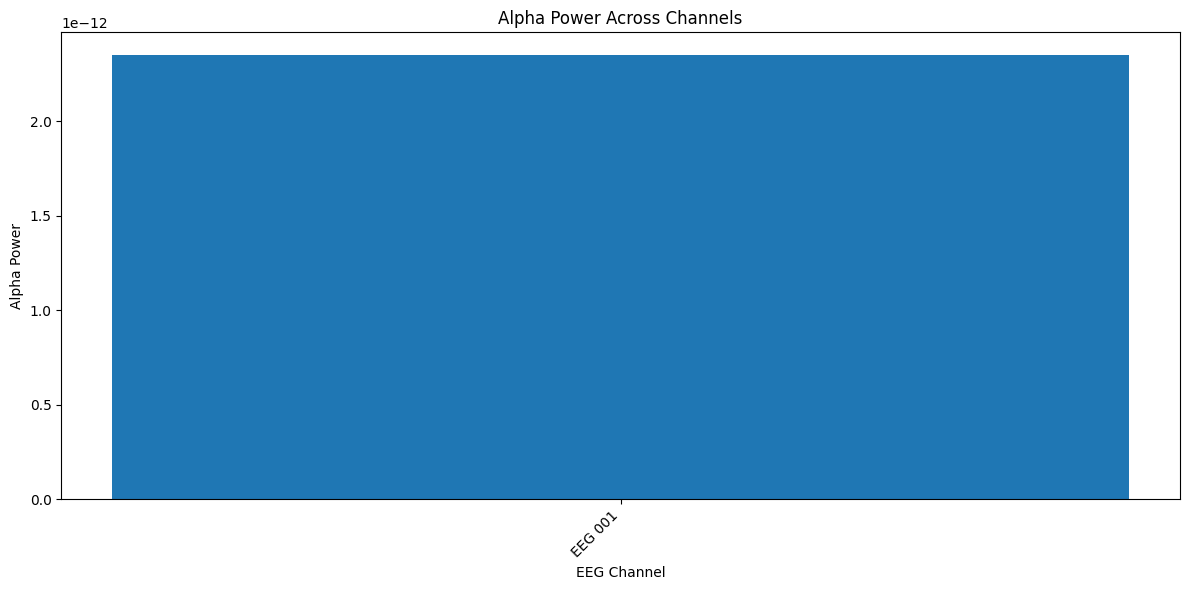

In [30]:
#Lets extract alpha wave power
import mne
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

sfreq = 250  # Sampling frequency
n_channels = 1
n_samples = sfreq * 10  # 10 seconds of data
data = np.random.randn(n_channels, n_samples) * 1e-5  # Dummy data
info = mne.create_info(ch_names=['EEG 001'], sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

# 2. Preprocessing: Bandpass filter for alpha band
raw.filter(l_freq=8, h_freq=12, fir_design='firwin')

# 3. Power Spectral Density (PSD) Estimation
# Using Welch's method
spectrum = raw.compute_psd(method='welch', fmin=8, fmax=12, picks='eeg')
psds, freqs = spectrum.get_data(return_freqs=True)

# 4. Extract Alpha Power
# Integrate the PSD over the alpha band
alpha_power = np.trapezoid(psds, freqs, axis=-1) # Changed from np.trapz to np.trapezoid

print(f"Alpha power for each channel: {alpha_power}")

plt.figure(figsize=(12, 6))
plt.bar(info.ch_names, alpha_power) # Changed info to info.ch_names
plt.xlabel('EEG Channel')
plt.ylabel('Alpha Power')
plt.title('Alpha Power Across Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Variance over time for each channel:
[0.00069394 0.00087981 0.00059632 0.00119381 0.00084714 0.00105401
 0.00085513 0.00087177 0.00080729 0.00065444 0.00082295 0.00099835
 0.00107868 0.00089322 0.00099895 0.00083067 0.00092161 0.00061828
 0.00058054 0.00102004 0.00102841 0.00085041 0.00088596 0.00054522
 0.00124096 0.00076332 0.00084236 0.00086117 0.00085232 0.00087628
 0.00087606 0.00085429]


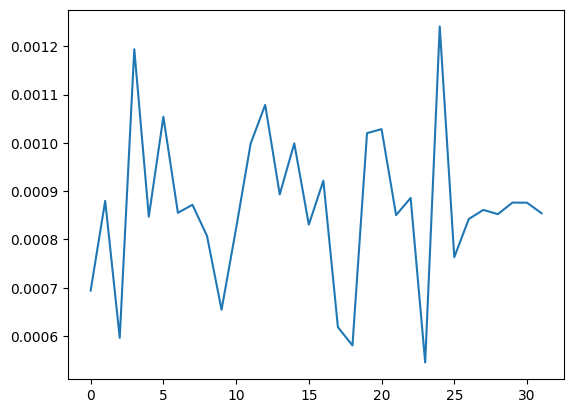

In [11]:
#lets track amplitude variance
import mne
import numpy as np
import matplotlib.pyplot as plt

variance_over_time = np.var(smoothed_data_sg, axis=0)

print("Variance over time for each channel:")
print(variance_over_time)

plt.plot(variance_over_time)

In [12]:
# T test
from scipy import stats
import numpy as np # Import numpy

group1_data = np.array(df_normalized_sklearn[['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz']])
group2_data = np.array(df_normalized_sklearn[['Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']])

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation (e.g., at alpha = 0.05)
alpha = 0.05

print("\nInterpretation:")
for i, (t, p) in enumerate(zip(t_statistic, p_value)):
    if p < alpha:
        print(f"For column {i+1}: Reject the null hypothesis (T-statistic: {t:.2f}, P-value: {p:.4e}). There is a significant difference between the means of the two groups.")
    else:
        print(f"For column {i+1}: Fail to reject the null hypothesis (T-statistic: {t:.2f}, P-value: {p:.4e}). There is no significant difference.")

T-statistic: [  78.32544642  109.88358508  -55.89587862   73.17445576 -132.18690988
 -116.33013015 -157.13268164   35.92475595  -35.62637469    3.15970976
   18.60411028   19.05152058  119.87519617 -111.12851304   66.63902254
  122.03898944]
P-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.82137007e-272
 1.15735151e-267 1.58218137e-003 1.87680938e-076 4.82711500e-080
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]

Interpretation:
For column 1: Reject the null hypothesis (T-statistic: 78.33, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For column 2: Reject the null hypothesis (T-statistic: 109.88, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For column 3: Reject the null hypothesis (T-statistic: -55.90, P-value: 0.0000e+00). There is a significant difference between the means of the two groups.
For 

Mean: 0.4931249058951594
Standard Deviation: 0.09416951543910305
Median: 0.4847078757611171
Max: 1.0
Min: 0.0
Variance: 0.008867897638035468
25th Percentile (Q1): 0.42848238063746047
75th Percentile (Q3): 0.5580128321008695
Sum: 63624.94785821705


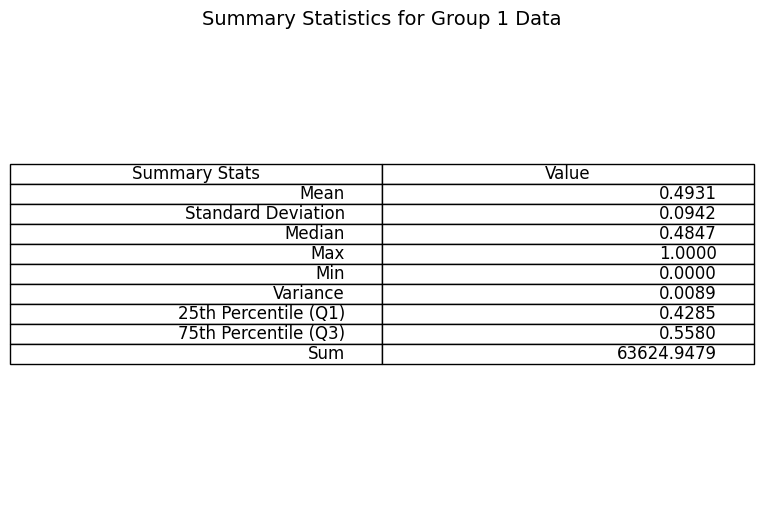

In [13]:
# Summary statistics

mean_val = group1_data.mean()
std_val = group1_data.std()
median_val = np.median(group1_data)
max_val = group1_data.max()
min_val = group1_data.min()
var_val = group1_data.var()
q1_val = np.quantile(group1_data, 0.25)
q3_val = np.quantile(group1_data, 0.75)
sum_val = group1_data.sum()

print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Median: {median_val}")
print(f"Max: {max_val}")
print(f"Min: {min_val}")
print(f"Variance: {var_val}")
print(f"25th Percentile (Q1): {q1_val}")
print(f"75th Percentile (Q3): {q3_val}")
print(f"Sum: {sum_val}")

# Prepare data for plt.table
stats_labels = [
    "Mean", "Standard Deviation", "Median", "Max", "Min",
    "Variance", "25th Percentile (Q1)", "75th Percentile (Q3)", "Sum"
]
stats_values = [
    f"{mean_val:.4f}", f"{std_val:.4f}", f"{median_val:.4f}",
    f"{max_val:.4f}", f"{min_val:.4f}", f"{var_val:.4f}",
    f"{q1_val:.4f}", f"{q3_val:.4f}", f"{sum_val:.4f}"
]

# Create a list of lists for cellText
cell_text = [[label, value] for label, value in zip(stats_labels, stats_values)]

# Create the table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off') # Hide axes

table = ax.table(cellText=cell_text, colLabels=["Summary Stats", "Value"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Summary Statistics for Group 1 Data', fontsize=14)
plt.show()

Mean: 0.4854432734047113
Standard Deviation: 0.09473971286608657
Median: 0.4725427785993279
Max: 1.0000000000000002
Min: 0.0
Variance: 0.008975613193948528
25th Percentile (Q1): 0.41729478913670537
75th Percentile (Q3): 0.5589730885838453
Sum: 62633.832907769465


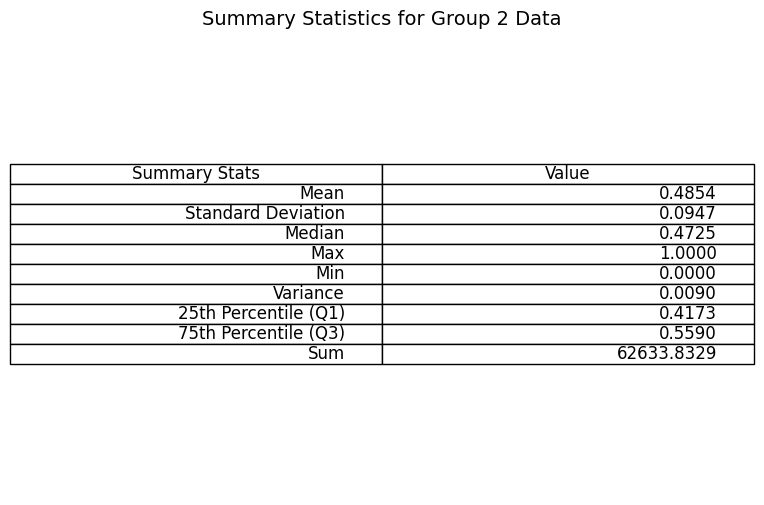

In [31]:
mean_val = group2_data.mean()
std_val = group2_data.std()
median_val = np.median(group2_data)
max_val = group2_data.max()
min_val = group2_data.min()
var_val = group2_data.var()
q1_val = np.quantile(group2_data, 0.25)
q3_val = np.quantile(group2_data, 0.75)
sum_val = group2_data.sum()

print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Median: {median_val}")
print(f"Max: {max_val}")
print(f"Min: {min_val}")
print(f"Variance: {var_val}")
print(f"25th Percentile (Q1): {q1_val}")
print(f"75th Percentile (Q3): {q3_val}")
print(f"Sum: {sum_val}")

# Prepare data for plt.table
stats_labels = [
    "Mean", "Standard Deviation", "Median", "Max", "Min",
    "Variance", "25th Percentile (Q1)", "75th Percentile (Q3)", "Sum"
]
stats_values = [
    f"{mean_val:.4f}", f"{std_val:.4f}", f"{median_val:.4f}",
    f"{max_val:.4f}", f"{min_val:.4f}", f"{var_val:.4f}",
    f"{q1_val:.4f}", f"{q3_val:.4f}", f"{sum_val:.4f}"
]

# Create a list of lists for cellText
cell_text = [[label, value] for label, value in zip(stats_labels, stats_values)]

# Create the table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off') # Hide axes

table = ax.table(cellText=cell_text, colLabels=["Summary Stats", "Value"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Summary Statistics for Group 2 Data', fontsize=14)
plt.show()

True Negatives: 3175
False Positives: 85
False Negatives: 88
True Positives: 3104
Accuracy: 0.9731866088034717


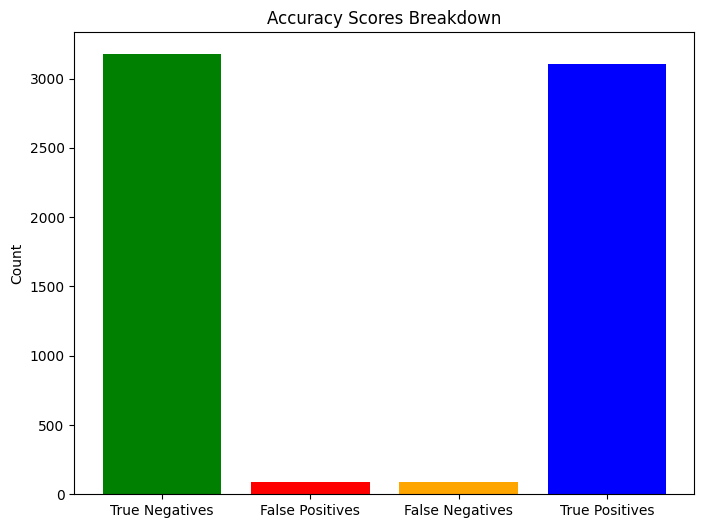

In [40]:
#Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np # Ensure numpy is imported
import matplotlib.pyplot as plt

# Assume group1_data represents features for class 0 and group2_data for class 1
# Concatenate the data and create corresponding labels
X = np.vstack((group1_data, group2_data))
y = np.hstack((np.zeros(group1_data.shape[0]), np.ones(group2_data.shape[0])))

# Train/Test split
# X is the combined features, y is the combined labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=321)

# No reshaping needed as X already has shape (n_samples, n_features)
x_train_array = x_train # Already correctly shaped for multiple features
# Build a model
logistic = LogisticRegression(max_iter=1000) # Added max_iter for convergence
# Fit a model
model = logistic.fit(x_train_array, y_train)
# Reshape indep variables of testing data
x_test_array = x_test # Already correctly shaped for multiple features
# Make prediction
y_pred = model.predict(x_test_array)
# Calculate confusion matrix and assign to the variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Accuracy: {accuracy}")

# Corrected plotting for confusion matrix components
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [tn, fp, fn, tp]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])
plt.ylabel('Count')
plt.title('Accuracy Scores Breakdown')
plt.show()

In [16]:
# Calculate accuracy score
# Manual_calculation - tp+tn: #data that are correctly classified
print((tp+tn)/(tn+fn+fp+tp))
#Using accuracy_score function
print(accuracy_score(y_test, y_pred))

0.9731866088034717
0.9731866088034717


Model Precision: 0.9733458764502979


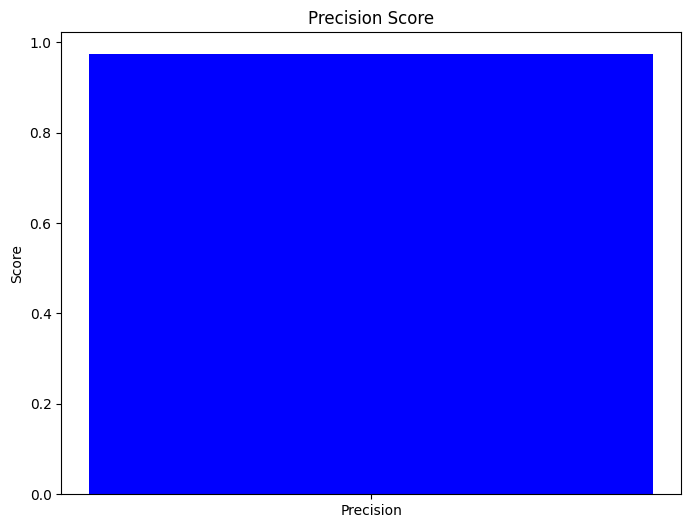

In [43]:
#Precision
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_model = model.predict(x_test)

precision_model = precision_score(y_test, y_pred_model)
print(f"Model Precision: {precision_model}")

# Corrected plotting for precision score
labels = ['Precision']
counts = [precision_model] # Only include the scalar precision score

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue']) # Use a single color since there's one bar
plt.ylabel('Score')
plt.title('Precision Score')
plt.show()

Within-group standard deviation (σw): 0.0702


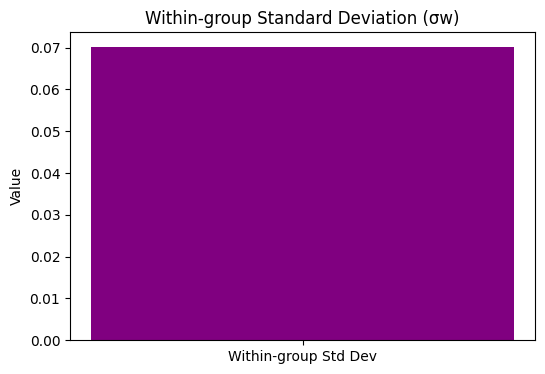

In [44]:
# Repeatability

# Calculate the standard deviation for each column (channel) in group1_data
std_group1_columns = group1_data.std(axis=0)

# Calculate the standard deviation for each column (channel) in group2_data
std_group2_columns = group2_data.std(axis=0)

# Combine the standard deviations from both groups and calculate the pooled within-group standard deviation (σw)
# One way to pool is to average the standard deviations across all channels from both groups
sigma_w = np.mean(np.hstack((std_group1_columns, std_group2_columns)))

print(f"Within-group standard deviation (σw): {sigma_w:.4f}")

# Plotting sigma_w
plt.figure(figsize=(6, 4))
plt.bar(['Within-group Std Dev'], [sigma_w], color='purple')
plt.ylabel('Value')
plt.title('Within-group Standard Deviation (σw)')
plt.ylim(bottom=0) # Ensure the y-axis starts from 0
plt.show()